<img src='../OUTILS/bandeau_MF.png' align='right' width='100%'/>

<div class="alert alert-info alert-success">
<h3>Élaboration d'image composite MTG / FCI avec SATPY </h3></div>

## <a id='TOC-TOP'></a>Contenus

<div class="alert alert-block alert-warning">
    
<b>PREREQUIS </b>
    
Ce Notebook ne nécessite pas de prérequis. 
Le kernel "env_MF_stage" doit être utilisé

</div>
<hr>

SatPy

Il s'agit d'une bibliothèque Python pour le traitement des données des satellites météorologiques

Satpy permet de lire, manipuler et écrire des données issues d'instruments satellites météorologiques d'observation de la Terre.

Satpy fournit la possibilité de lire les données de différents formats (readers) et de manipuler les paramètres géophysiques de ces différents formats de fichiers.

Satpy fournit également des interfaces pour créer des images RVB (rouge/vert/bleu) qui combinent les données de plusieurs bandes d'instruments ou produits.

Diverses corrections atmosphériques et améliorations visuelles sont fournies pour améliorer le rendu et la qualité des images de sortie. Les données de sortie peuvent être écrites dans plusieurs formats de fichiers tels que les fichiers NetCDF, PNG et GeoTIFF.

Satpy permet également aux utilisateurs de rééchantillonner les données sur des grilles géographiques projetées (zones).

Pour obtenir de la documentation sur Satpy, quelques exemples, et un tutoriel de démarrage rapide : https://satpy.readthedocs.io/en/latest/index.html

<div class="alert alert-info" role="alert">

### <a id='section1'></a>1.Tout d'abord, il faut procéder à l'importation des librairies nécessaires.

</div>

In [1]:
from satpy.scene import Scene
from satpy import find_files_and_readers
from datetime import datetime
import sys
from pyresample.geometry import AreaDefinition
import numpy as np
import os
from osgeo import gdal
from PIL import Image
import subprocess
os.environ['PATH'] = f"~/.conda/envs/env_MF_stage/bin:{os.environ['PATH']}" 
os.environ['GDAL_DATA'] = '/home/coster/.conda/envs/env_MF_stage/share/gdal'
os.environ['PROJ_LIB'] = '/home/coster/.conda/envs/env_MF_stage/share/proj'

<div class="alert alert-info" role="alert">
    
### <a id='section2'></a>2.Définition du produit, date et heure, reader, et répertoires.

</div>

### Données d'entrée : fichiers chunk mtg (40)

In [2]:
input = '../../MF_DATA/chunk_decomp/'

In [3]:
download_dir = os.path.join(os.getcwd(), "../RESULTS")
os.makedirs(download_dir, exist_ok=True)

In [4]:
output = '../RESULTS'

### Choix de la RGB à produire, parmi notamment:
airmass ash cimss_cloud_type cloud_phase cloud_phase_distinction cloud_phase_distinction_raw cloud_phase_raw cloudtop convection day_microphysics dust fog green_snow ir108_3d ir_cloud_day natural_color ndvi_hybrid_green night_fog night_microphysics rocket_plume_day rocket_plume_night true_color true_color_reproduction 

In [5]:
composite_name = "cloud_phase"

### Définition de la date et heure de la composite à créer
(202401091200 disponible par défaut)

In [6]:
annee='2024'
mois='01'
jour='09'
heure='12'

In [7]:
yyyy=int(annee)
mm=int(mois)
dd=int(jour)
hh_debut=int(heure)
min_debut=int('00')
hh_fin=int(heure)
min_fin=int('10')

In [8]:
!echo {min_debut}

0


### Définition du reader

In [9]:
reader_to_use = "fci_l1c_nc"

In [10]:
filename = (output + '/RGB_' + composite_name )

In [11]:
myfiles = find_files_and_readers(base_dir=input,
                                 start_time=datetime(yyyy,mm,dd,hh_debut,min_debut),
                                 end_time=datetime(yyyy,mm,dd,hh_fin,min_fin),
                                 reader=reader_to_use)

In [12]:
#!gdalinfo ../../MF_DATA/chunk_decomp/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY--DIS-NC4E_C_EUMT_20240109121040_IDPFI_OPE_20240109120908_20240109120924_N_JLS_C_0073_0040.nc

In [13]:
#!gdalinfo NETCDF:"../../MF_DATA/chunk_decomp/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY--DIS-NC4E_C_EUMT_20240109121040_IDPFI_OPE_20240109120908_20240109120924_N_JLS_C_0073_0040.nc":/data/vis_04/measured/pixel_quality

In [14]:
scn = Scene(filenames=myfiles)

### Liste de toutes les composites disponibles

In [15]:
#print(scn.available_composite_names())

### Liste de tous les dataset disponibles

In [16]:
#print(scn.available_dataset_names())

<div class="alert alert-info" role="alert">
    
### <a id='section2'></a>3.Création du produit.

</div>

In [17]:
scn.load([composite_name], upper_right_corner='NE')

In [18]:
natscn = scn.resample(scn.coarsest_area(), resampler='nearest')

In [19]:
natscn.save_dataset(composite_name, filename=filename + '.tif')

### Défnition de la taille de l'image globe (pixels)

In [20]:
taille_redim=800  # 5568x5568 par défaut

In [21]:
!gdalwarp -overwrite -ts 800 800 {filename}.tif {filename}_redim.tif

Using band 4 of source image as alpha.
Creating output file that is 800P x 800L.
Processing ../RESULTS/RGB_cloud_phase.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [22]:
!convert -resize 500 {filename}_redim.tif {filename}_redim.jpg

convert: Unknown field with tag 33550 (0x830e) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
convert: Unknown field with tag 33922 (0x8482) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
convert: Unknown field with tag 34735 (0x87af) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
convert: Unknown field with tag 34736 (0x87b0) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
convert: Unknown field with tag 34737 (0x87b1) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.


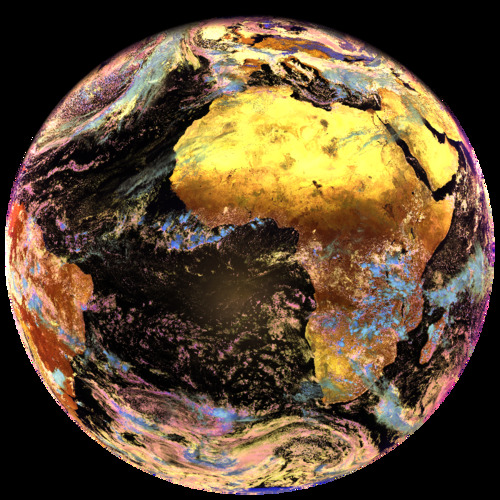

In [23]:
imgredim = Image.open(filename + '_redim.jpg')
display(imgredim)

### Ajout des frontières

In [24]:
# Chemins vers les fichiers shapefile contenant les frontieres des pays : '../OUTILS/boundary/world-administrative-boundaries.shp' 

In [25]:
!gdal_rasterize -q -b 1 -burn 255 -b 2 -burn 255 -b 3 -burn 255 -l world-administrative-boundaries ../OUTILS/boundary/world-administrative-boundaries.shp {filename}.tif >/dev/null 2>&1 # frontière blanche
#!gdal_rasterize -q -b 1 -burn 255 -b 2 -burn 0 -b 3 -burn 0 -l world-administrative-boundaries ../OUTILS/boundary/world-administrative-boundaries.shp {filename}.tif >/dev/null 2>&1 # frontière rouge

### Affichage de l'image globe dans le jupyter notebook

In [26]:
!convert -resize 800 {filename}.tif {filename}_min.jpg

convert: Unknown field with tag 33550 (0x830e) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
convert: Unknown field with tag 33922 (0x8482) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
convert: Unknown field with tag 34735 (0x87af) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
convert: Unknown field with tag 34736 (0x87b0) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
convert: Unknown field with tag 34737 (0x87b1) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.


In [27]:
!ls -lrth {filename}.tif {filename}_min.jpg

-rw-r--r--. 1 coster coster 207M Oct  9 08:15 ../RESULTS/RGB_cloud_phase.tif
-rw-r--r--. 1 coster coster 331K Oct  9 08:16 ../RESULTS/RGB_cloud_phase_min.jpg


In [28]:
!identify {filename}.tif {filename}_min.jpg

../RESULTS/RGB_cloud_phase.tif TIFF 11136x11136 11136x11136+0+0 8-bit sRGB 206.038MiB 0.000u 0:00.000
../RESULTS/RGB_cloud_phase_min.jpg JPEG 800x800 800x800+0+0 8-bit sRGB 338814B 0.000u 0:00.000
identify: Unknown field with tag 33550 (0x830e) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
identify: Unknown field with tag 33922 (0x8482) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
identify: Unknown field with tag 34735 (0x87af) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
identify: Unknown field with tag 34736 (0x87b0) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
identify: Unknown field with tag 34737 (0x87b1) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.


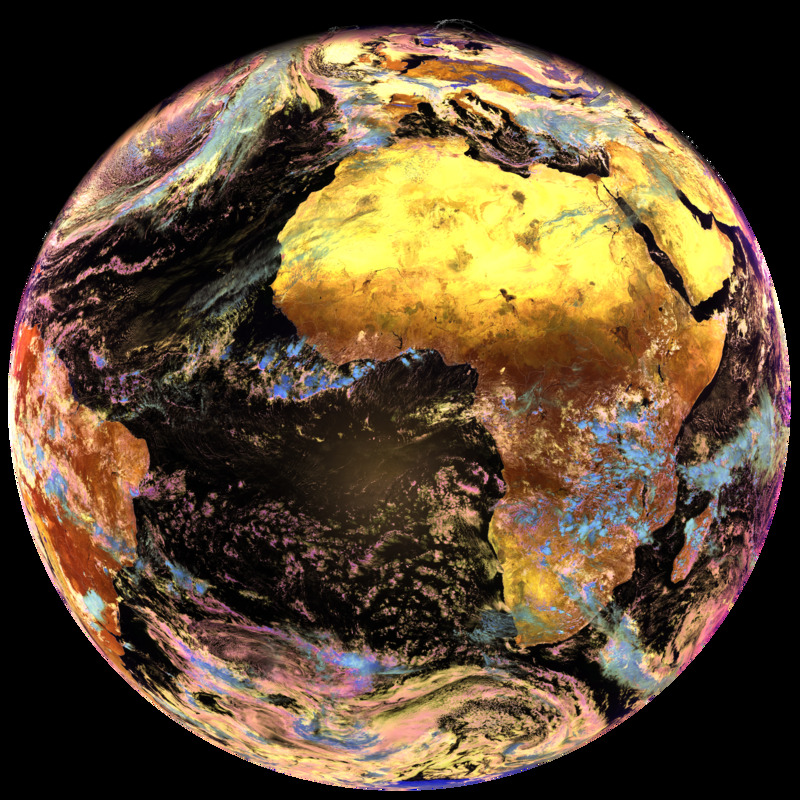

In [29]:
im = Image.open(filename + '_min.jpg')
display(im)

In [30]:
!echo {filename}_min.jpg

../RESULTS/RGB_cloud_phase_min.jpg


<div class="alert alert-info" role="alert">
    
### <a id='section2'></a>4.Création d'une image à partir d'une zone de découpe 

</div>

In [31]:
### Définition de la zone, et redimmensionnement de l'image 

In [32]:
#exemple nord-ouest Afrique = 40,8,-23,15
coord_nord = 40
coord_sud = 4
coord_ouest = -23
coord_est = 25


In [33]:
# Facteur de mise à l'échelle
scale_factor = 0.04  # 0.04 par défaut

In [34]:
#Exemple de passage en système de coordonnées géographiques (GCS) système de coordonnées WGS84 afin d'utiliser des coordonnées en degrés ("EPSG:4326"):
#Définition de la zone de découpe (étendue géographique) -te (target extent) en degrés

In [35]:
!gdalwarp -overwrite -t_srs "EPSG:4326" -te {coord_ouest} {coord_sud} {coord_est} {coord_nord}  {filename}.tif {filename}_decoupe_HD.tif
!gdalwarp -overwrite -t_srs "EPSG:4326" -te {coord_ouest} {coord_sud} {coord_est} {coord_nord}  {filename}.tif {filename}_decoupe_HD.png
!gdalwarp -overwrite -t_srs "EPSG:4326" -te {coord_ouest} {coord_sud} {coord_est} {coord_nord} {filename}.tif {filename}_decoupe_HD.jpg

Using band 4 of source image as alpha.
Creating output file that is 5306P x 3979L.
Processing ../RESULTS/RGB_cloud_phase.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Using band 4 of source image as alpha.
Creating output file that is 5306P x 3979L.
0...10...20...30...40...50...60...70...80...90...100 - done.
Using band 4 of source image as alpha.
Creating output file that is 5306P x 3979L.
0Warning 1: 4-band JPEGs will be interpreted on reading as in CMYK colorspace
...10...20...30...40...50...60...70...80...90...100 - done.


In [36]:
### Affichage des différentes tailles de fichiers

In [37]:
!ls -lhtr {filename}_decoupe_HD.tif {filename}_decoupe_HD.png {filename}_decoupe_HD.jpg 

-rw-r--r--. 1 coster coster  81M Oct  9 08:16 ../RESULTS/RGB_cloud_phase_decoupe_HD.tif
-rw-r--r--. 1 coster coster  29M Oct  9 08:16 ../RESULTS/RGB_cloud_phase_decoupe_HD.png
-rw-r--r--. 1 coster coster 7.2M Oct  9 08:16 ../RESULTS/RGB_cloud_phase_decoupe_HD.jpg


In [38]:
!identify {filename}_decoupe_HD.tif {filename}_decoupe_HD.png {filename}_decoupe_HD.jpg 

../RESULTS/RGB_cloud_phase_decoupe_HD.tif TIFF 5306x3979 5306x3979+0+0 8-bit sRGB 80.5613MiB 0.010u 0:00.000
../RESULTS/RGB_cloud_phase_decoupe_HD.png PNG 5306x3979 5306x3979+0+0 8-bit sRGB 28.4621MiB 0.000u 0:00.000
../RESULTS/RGB_cloud_phase_decoupe_HD.jpg JPEG 5306x3979 5306x3979+0+0 8-bit CMYK 7.10599MiB 0.000u 0:00.000
identify: Unknown field with tag 33550 (0x830e) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
identify: Unknown field with tag 33922 (0x8482) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
identify: Unknown field with tag 34735 (0x87af) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
identify: Unknown field with tag 34736 (0x87b0) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.
identify: Unknown field with tag 34737 (0x87b1) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/958.


In [39]:
!convert -resize 1000 {filename}_decoupe_HD.png {filename}_decoupe_min.jpg
!ls -lhtr {filename}_decoupe_min.jpg

-rw-r--r--. 1 coster coster 366K Oct  9 08:16 ../RESULTS/RGB_cloud_phase_decoupe_min.jpg


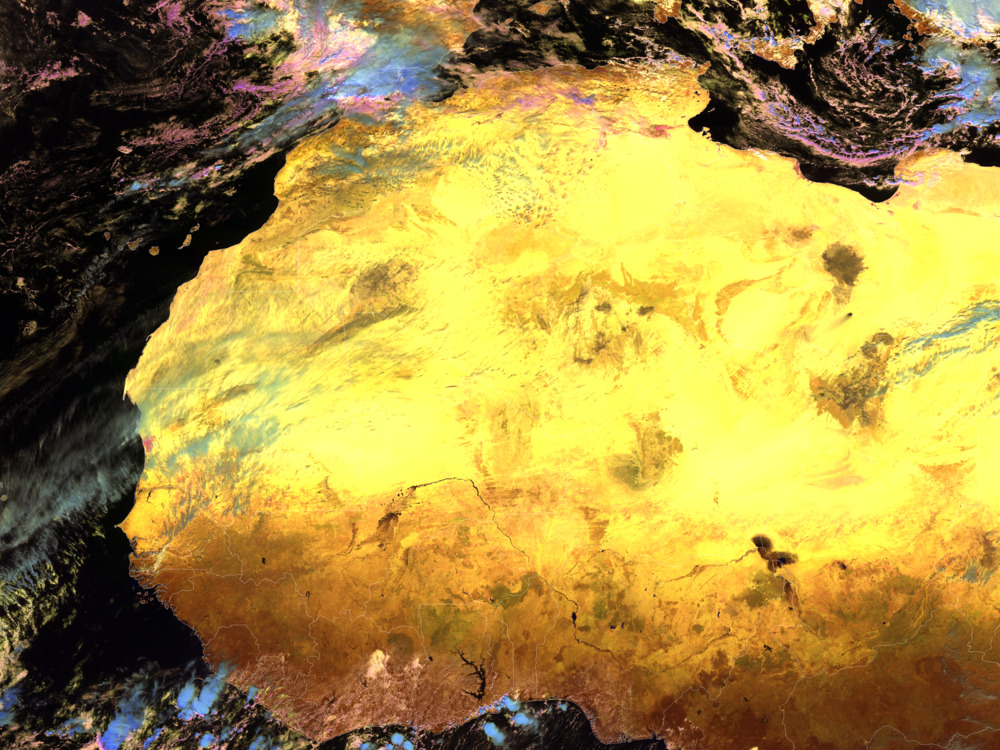

In [40]:
im2 = Image.open(filename + '_decoupe_min.jpg')
display(im2)

<div class="alert alert-info" role="alert">
    
### <a id='section2'></a>5. Reprojection de l'image

</div>


#### Définition de la reprojection et de la zone de découpe de l'image à reprojeter

In [41]:
#Exemple pour la projection orthographique ("ortho"):
#Modification des coordonnées du centre de l'image lat et lon
#Définition du redimmensionnent de l'image (facultatif) en spécifiant la largeur et la hauteur : option -ts (target size) en pixels
#Définition de la zone de découpe (étendue géographique) -te (target extent) en mètres
#Attention à conserver les proportions largeur/hauteur entre les options -ts et -te


In [42]:
!gdalwarp -q -overwrite -t_srs "+proj=ortho +lat_0=24 +lon_0=3" -ts 3000 2300 -te -3000000 -2300000 3000000 2300000 {filename}.tif {filename}_ortho.jpg

Warning 1: 4-band JPEGs will be interpreted on reading as in CMYK colorspace


In [43]:
!convert -resize 800 {filename}_ortho.jpg {filename}_ortho_min.png

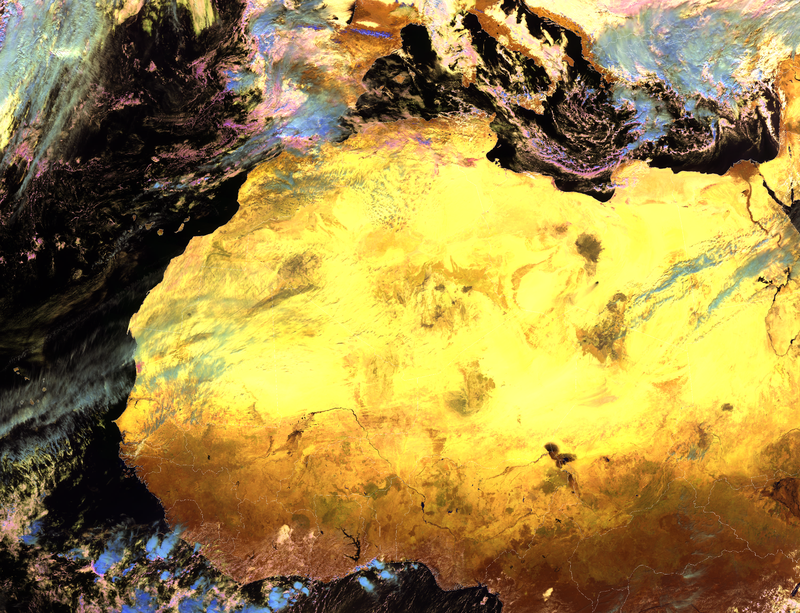

In [44]:
im3 = Image.open(filename + '_ortho_min.png')
display(im3)

In [45]:
### Ajout texte et logo

In [46]:
!convert {filename}_ortho_min.png -font DejaVu-Sans -pointsize 17 -fill '#ffffff'  -annotate +30+30 "{composite_name} RGB le {jour}/{mois}/{annee} à {heure} h UTC" {filename}_ortho_min_annotee.jpg

In [47]:
!convert {filename}_ortho_min_annotee.jpg ../OUTILS/logo_mf_min_100x100.png  -gravity SouthEast -geometry +20+20 -composite {filename}_finale.jpg

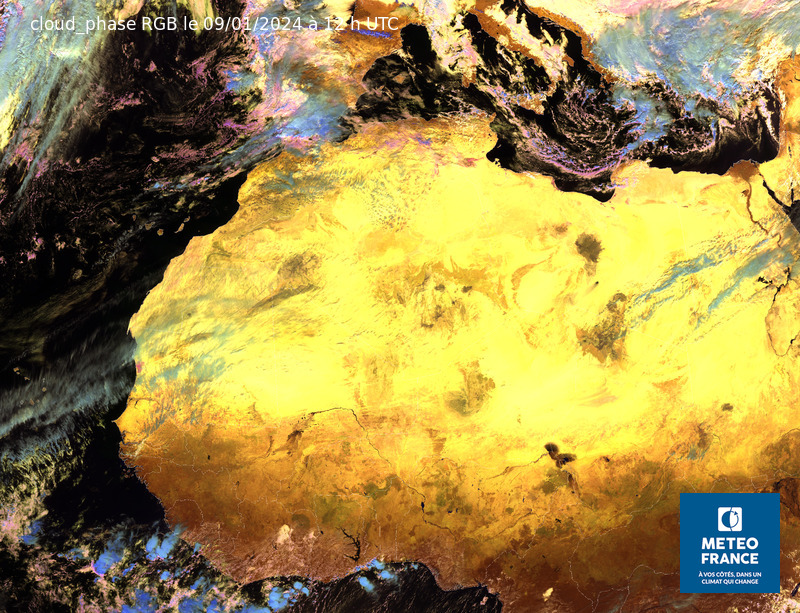

In [48]:
im5 = Image.open(filename + '_finale.jpg')
display(im5)

### Nettoyage

In [49]:
#!rm {output}/*xml {output}/*.tif

In [50]:
#!rm -f {output}/*